In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

from ML2_lib import loss
from ML2_lib import noise
from ML2_lib import algo_sgd
from  ML2_lib import merge


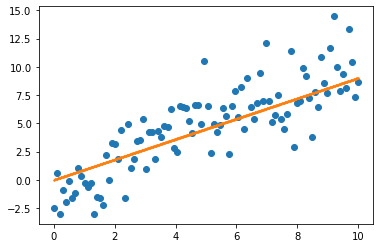

In [13]:
# データ生成デモ Gauss
X = np.linspace(0,10,100)
np.random.shuffle(X)
Y = noise.Gauss(sigma=2.2,dim=X.shape[0],n=1).generate() + X



a = loss.LinearQuadraticLoss()

data = [X,Y]
core = algo_sgd.SGD(w_init=0,a=0.001,t_max=99,data=data)
for _ in core:
    core.update(a)



x_m = np.linspace(0,10,1000)
y_m = a.predict(x_m,core.w)
plt.scatter(X,Y)
plt.scatter(x_m,y_m,s=1)

plt.show()



In [3]:
trial_num = 100 #試行回数
result = [] #パラメータの最終結果　トライアル数*分割数k*特徴量次元
result_loss = [] # 過剰期待損失の最終結果　トライアル数*分割数k
valid_k = 100 # 分割数　1 ~ valid_k
for _ in tqdm(range(trial_num)):
    s = []
    loss_store = []
    a = 0.01
    c = 5
    n = 250
    b = 2.2
    for k in range(1,valid_k+1):
        core_store = []
        model_store = []



        son = loss.LinearQuadraticLoss()
        for i in range(k):
            core_num = n // k
            X = np.linspace(0,10,core_num)
            np.random.shuffle(X)
            Y = noise.Gauss(sigma=b,dim=X.shape[0],n=1).generate() + X
            data = [X,Y]
            # 初期値wの決定
            w = (c - (-c)) * np.random.rand() + (-c)
            core = algo_sgd.SGD(w_init=w,a=a,t_max=core_num-1,data=data)
            for _ in core:
                core.update(son)
            core_store.append(core)
            model_store.append(core.w)

        model_store = np.array(model_store)
        model_store = model_store.reshape([-1,1])
        tmp = merge.smallball(model_store)
        s.append(tmp)
        loss_store.append(son.f(y=X.mean(),x=X.mean(),w=tmp))

    result.append(np.array(s))
    result_loss.append(np.array(loss_store))

result = np.array(result)
result_loss = np.array(result_loss)





  0%|          | 0/100 [00:00<?, ?it/s]

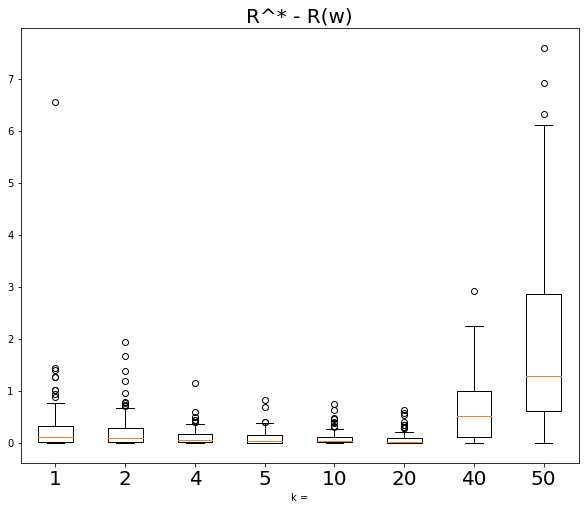

In [4]:
columns=['1', '2', '4','5','10','20','40','50']
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss[:,[0,1,3,4,9,19,39,49],0])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R^* - R(w)',fontsize=20)
ax1.set_xlabel('k =')

plt.show()

In [5]:
df = pd.DataFrame(result_loss[:,[0,1,3,4,9,19,39,49],0],columns=columns)

In [6]:
df.describe()

,1,2,4,5,10,20,40,50
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000
mean,3.115429e-01,0.231936,0.123096,0.105715,9.394905e-02,0.077753,0.644611,1.956819
std,7.114499e-01,0.352244,0.168275,0.144396,1.327499e-01,0.124221,0.642728,1.765929
min,5.492683e-07,0.000005,0.000010,0.000062,9.613401e-08,0.000006,0.000292,0.000480
25%,2.416193e-02,0.021892,0.017139,0.007020,1.498681e-02,0.007041,0.117925,0.606531
50%,1.157241e-01,0.087443,0.051681,0.047926,4.125042e-02,0.023085,0.527288,1.296475
75%,3.235323e-01,0.279408,0.169729,0.157577,1.227246e-01,0.090834,1.002415,2.868904
max,6.558904e+00,1.942787,1.153387,0.822630,7.502012e-01,0.638632,2.924484,7.598174


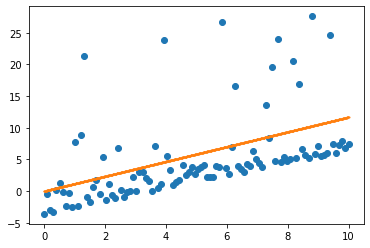

In [7]:
# データ生成デモ Log-normal
X = np.linspace(0,10,100)
np.random.shuffle(X)
Y = noise.LogNormal(sigma=1.75,dim=X.shape[0],n=1).generate() + X



a = loss.LinearQuadraticLoss()

data = [X,Y]
core = algo_sgd.SGD(w_init=0,a=0.001,t_max=99,data=data)
for _ in core:
    core.update(a)



x_m = np.linspace(0,10,1000)
y_m = a.predict(x_m,core.w)
plt.scatter(X,Y)
plt.scatter(x_m,y_m,s=1)



In [8]:
trial_num = 100 #試行回数
result = [] #パラメータの最終結果　トライアル数*分割数k*特徴量次元
result_loss = [] # 過剰期待損失の最終結果　トライアル数*分割数k
valid_k = 100 # 分割数　1 ~ valid_k
for _ in tqdm(range(trial_num)):
    s = []
    loss_store = []
    a = 0.01
    c = 5
    n = 250
    b = 1.75
    for k in range(1,valid_k+1):
        core_store = []
        model_store = []



        son = loss.LinearQuadraticLoss()
        for i in range(k):
            core_num = n // k
            X = np.linspace(0,10,core_num)
            np.random.shuffle(X)
            Y = noise.LogNormal(sigma=b,dim=X.shape[0],n=1).generate() + X
            data = [X,Y]
            w = (c - (-c)) * np.random.rand() + (-c)
            core = algo_sgd.SGD(w_init=w,a=a,t_max=core_num-1,data=data)
            for _ in core:
                core.update(son)
            core_store.append(core)
            model_store.append(core.w)

        model_store = np.array(model_store)
        model_store = model_store.reshape([-1,1])
        tmp = merge.smallball(model_store)
        s.append(tmp)
        loss_store.append(son.f(y=X.mean(),x=X.mean(),w=tmp))

    result.append(np.array(s))
    result_loss.append(np.array(loss_store))

result = np.array(result)
result_loss = np.array(result_loss)





  0%|          | 0/100 [00:00<?, ?it/s]

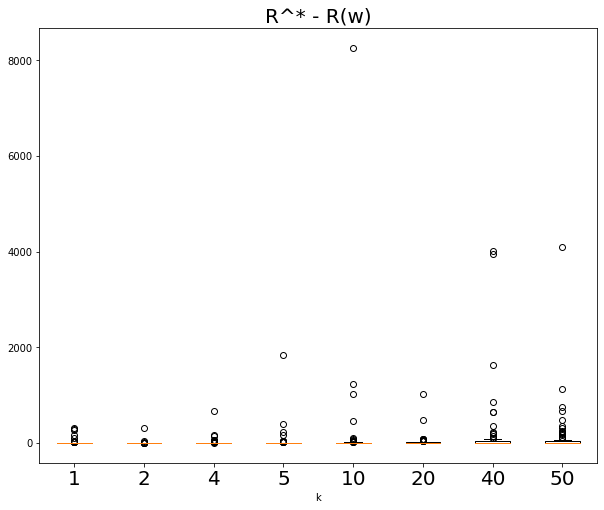

In [9]:
fig = plt.figure(figsize=(10.0, 8.0))
ax1 = fig.add_subplot(111)

bp1 = ax1.boxplot(result_loss[:,[0,1,3,4,9,19,39,49],0])
ax1.set_xticklabels(columns,fontsize=20)
ax1.set_title('R^* - R(w)',fontsize=20)
ax1.set_xlabel('k')

plt.show()

In [10]:
df = pd.DataFrame(result_loss[:,[0,1,3,4,9,19,39,49],0],columns=columns)

In [11]:
df.describe()

,1,2,4,5,10,20,40,50
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,15.803603,5.471558,13.987289,29.800918,117.448264,24.926014,142.995220,104.778445
std,53.246110,31.235157,69.516327,189.607209,839.393513,112.734282,589.118197,436.398607
min,0.028740,0.000060,0.001028,0.000021,0.004051,0.000002,0.005787,0.004440
25%,0.915740,0.419829,0.412729,0.269261,0.462293,0.283775,1.134449,1.050089
50%,2.492435,1.139155,1.063430,0.916582,3.066568,2.475458,6.884645,4.954609
75%,4.964791,2.520682,3.741263,4.268372,8.989004,11.225312,35.840432,34.913566
max,310.122972,309.779285,659.381364,1845.416678,8265.104772,1018.045041,4019.353065,4102.660167
